In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

print("Package importing completed...")

Package importing completed...


In [2]:
# Kaggle dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

data = pd.read_csv("/content/spam.csv", encoding='latin-1')
print("Dataset importing completed...")

#Preview dataset
print("---------")
print("| Shape |")
print("---------")
print(data.shape)

Dataset importing completed...
---------
| Shape |
---------
(5572, 2)


In [3]:
# Preview dataset
print(data.head)

<bound method NDFrame.head of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham             Will Ã_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>


In [4]:
# Renaming column heads
data = data.rename(columns={'v1':'Label', 'v2':'Text'})
data['Target'] = data['Label'].map({'Valid':0, 'Spam':1})
print("Updated column head names completed...")

Updated column head names completed...


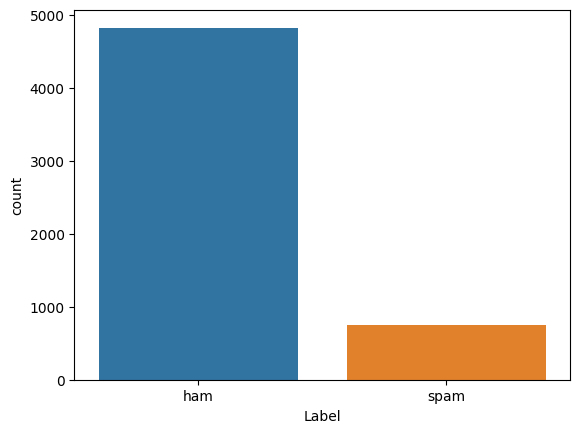

In [5]:
# Visualize distribution of data
sns.countplot(x=data['Label'])
plt.show()

In [6]:
# Calculate average number of words in each SMS message
average_word_count = round(sum([len(i.split()) for i in data['Text']])/len(data['Text']))
print("Average word count: ", average_word_count)

Average word count:  15


In [7]:
# Calculate total number of unique words in each SMS message
unique_words = set()
for i in data['Text']:
  for j in i.split():
    unique_words.add(j)
total_unique_words = len(unique_words)
print("Total unique words: ", total_unique_words)

Total unique words:  15585


In [8]:
# Split data into training and validation using 75% train and 25% test ratio
xData = np.asanyarray(data['Text'])
yData = np.asanyarray(data['Label'])
labeled_data = pd.DataFrame({'Text': xData, 'Label': yData})
xTrain, xTest, yTrain, yTest = train_test_split(labeled_data['Text'], labeled_data['Label'], test_size=0.25, random_state=3045)
print("Training and test dataset split completed...")

Training and test dataset split completed...


In [9]:
# Training model using MultinomialNB
tfidf_vectorized = TfidfVectorizer().fit(xTrain)
xTrain_vectorized, xTest_vectorized = tfidf_vectorized.transform(xTrain), tfidf_vectorized.transform(xTest)

model = MultinomialNB()
model.fit(xTrain_vectorized, yTrain)
prediction = model.predict(xTest_vectorized)
print("Model training completed...")

Model training completed...


In [10]:
# Model evaluation
print("------------------")
print("| Model Accuracy |")
print("------------------")

# Accuracy Score
accuracy = accuracy_score(yTest, prediction)
print("Accuracy: ", accuracy)

------------------
| Model Accuracy |
------------------
Accuracy:  0.9443946188340807


In [11]:
# Model evaluation
print("-------------------------")
print("| Classification Report |")
print("-------------------------")

report = classification_report(yTest, prediction)
print("Classification Report: ")
print(report)

-------------------------
| Classification Report |
-------------------------
Classification Report: 
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       947
        spam       1.00      0.63      0.77       168

    accuracy                           0.94      1115
   macro avg       0.97      0.82      0.87      1115
weighted avg       0.95      0.94      0.94      1115



--------------------
| Confusion Matrix |
--------------------


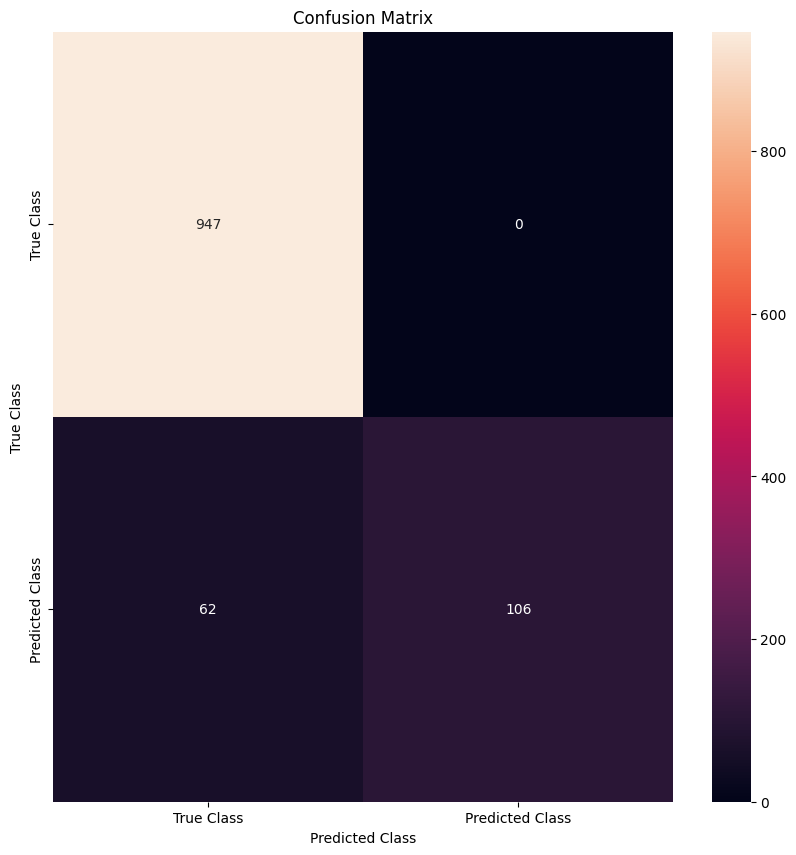

In [12]:
# Model evaluation
print("--------------------")
print("| Confusion Matrix |")
print("--------------------")

cm = confusion_matrix(yTest, prediction)
plt.figure(figsize = (10,10))
labels = ['True Class', 'Predicted Class']
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()